基底音: 正弦波(440 Hz, ド)

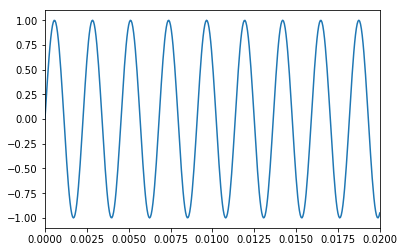

In [38]:
%matplotlib inline

import numpy
from math import pi
from IPython.display import Audio
import matplotlib.pyplot as plt

clock = numpy.linspace(0, 440*pi*2, 20000)
wave = numpy.sin(clock)

#plot the wave
plt.xlim(0,0.02)
plt.plot(clock/(440*pi*2),wave)

Audio(wave, rate=20000)



減衰させる。

In [40]:
clock = numpy.linspace(0, 440*pi*2, 20000)
decay = numpy.exp(-clock*0.001)

wave = numpy.sin(clock)

Audio(wave*decay, rate=20000)

2倍音。(振動数が2倍の音、1オクターブ上の音)

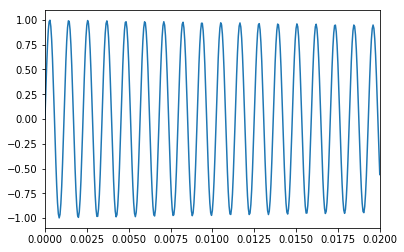

In [41]:
clock = numpy.linspace(0, 440*pi*2, 20000)
decay = numpy.exp(-clock*0.001)

wave = numpy.sin(2*clock)

#plot the wave
plt.xlim(0,0.02)
plt.plot(clock/(440*pi*2),wave*decay)

Audio(wave*decay, rate=20000)

3倍音。(振動数が3倍の音、1オクターブ上のソ)

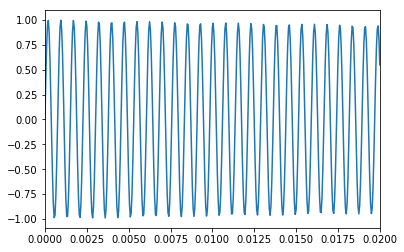

In [42]:
clock = numpy.linspace(0, 440*pi*2, 20000)
decay = numpy.exp(-clock*0.001)

wave = numpy.sin(3*clock)

#plot the wave
plt.xlim(0,0.02)
plt.plot(clock/(440*pi*2),wave*decay)

Audio(wave*decay, rate=20000)

4倍音。(振動数が4倍の音、2オクターブ上の同音)

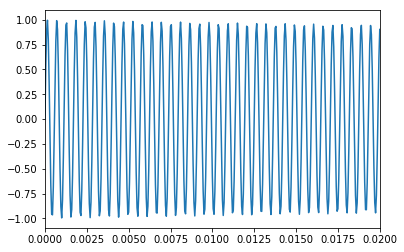

In [43]:
clock = numpy.linspace(0, 440*pi*2, 20000)
decay = numpy.exp(-clock*0.001)

wave = numpy.sin(4*clock)

#plot the wave
plt.xlim(0,0.02)
plt.plot(clock/(440*pi*2),wave*decay)

Audio(wave*decay, rate=20000)

基底音+倍音

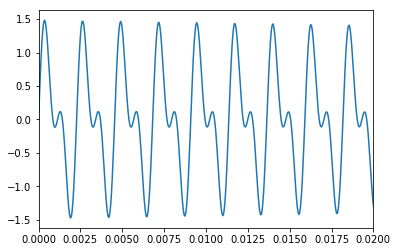

In [44]:
clock = numpy.linspace(0, 440*pi*2, 20000)
decay = numpy.exp(-clock*0.001)

wave = numpy.sin(clock)
wave += 0.5**0.5*numpy.sin(2*clock)

#plot the wave
plt.xlim(0,0.02)
plt.plot(clock/(440*pi*2),wave*decay)

Audio(wave*decay, rate=20000)

基底音+倍音+3倍音

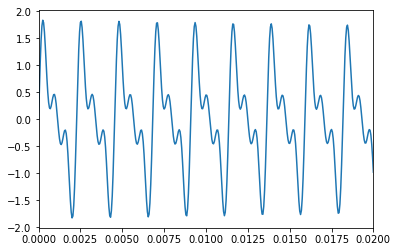

In [45]:
clock = numpy.linspace(0, 440*pi*2, 20000)
decay = numpy.exp(-clock*0.001)

wave = numpy.sin(clock)
wave += (1/2)**0.5*numpy.sin(2*clock)
wave += (1/3)**0.5*numpy.sin(3*clock)

#plot the wave
plt.xlim(0,0.02)
plt.plot(clock/(440*pi*2),wave*decay)

Audio(wave*decay, rate=20000)

基底音+倍音+3倍音+4倍音

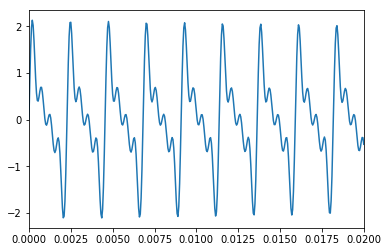

In [46]:
clock = numpy.linspace(0, 440*pi*2, 20000)
decay = numpy.exp(-clock*0.001)

wave = numpy.sin(clock)
wave += (1/2)**0.5*numpy.sin(2*clock)
wave += (1/3)**0.5*numpy.sin(3*clock)
wave += (1/4)**0.5*numpy.sin(4*clock)

#plot the wave
plt.xlim(0,0.02)
plt.plot(clock/(440*pi*2),wave*decay)

Audio(wave*decay, rate=20000)

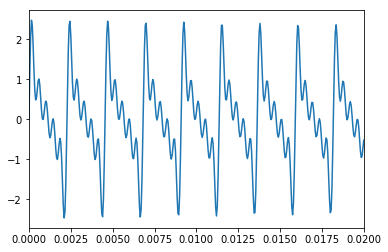

In [47]:
clock = numpy.linspace(0, 440*pi*2, 20000)
decay = numpy.exp(-clock*0.001)

wave = numpy.sin(clock)
wave += (1/2)**0.5*numpy.sin(2*clock)
wave += (1/3)**0.5*numpy.sin(3*clock)
wave += (1/4)**0.5*numpy.sin(4*clock)
wave += (1/3)**0.5*numpy.sin(5*clock)

#plot the wave
plt.xlim(0,0.02)
plt.plot(clock/(440*pi*2),wave*decay)

Audio(wave*decay, rate=20000)

上の波をフーリエ変換してパワースペクトル(周波数分布)を求める。

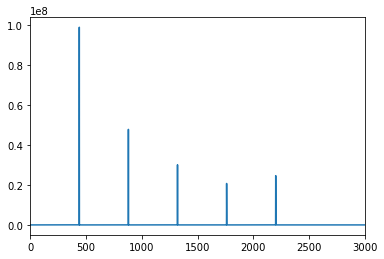

In [54]:
clock = numpy.linspace(0, 440*pi*2, 20000)
decay = numpy.exp(-clock*0.001)

wave = numpy.sin(clock)
wave += (1/2)**0.5*numpy.sin(2*clock)
wave += (1/3)**0.5*numpy.sin(3*clock)
wave += (1/4)**0.5*numpy.sin(4*clock)
wave += (1/3)**0.5*numpy.sin(5*clock)

spec = numpy.fft.fft(wave)

#plot the wave
plt.xlim(0,3000)
plt.plot(numpy.real(-spec*spec))
